In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.drop(['instant', 'dteday'], axis=1, inplace=True)

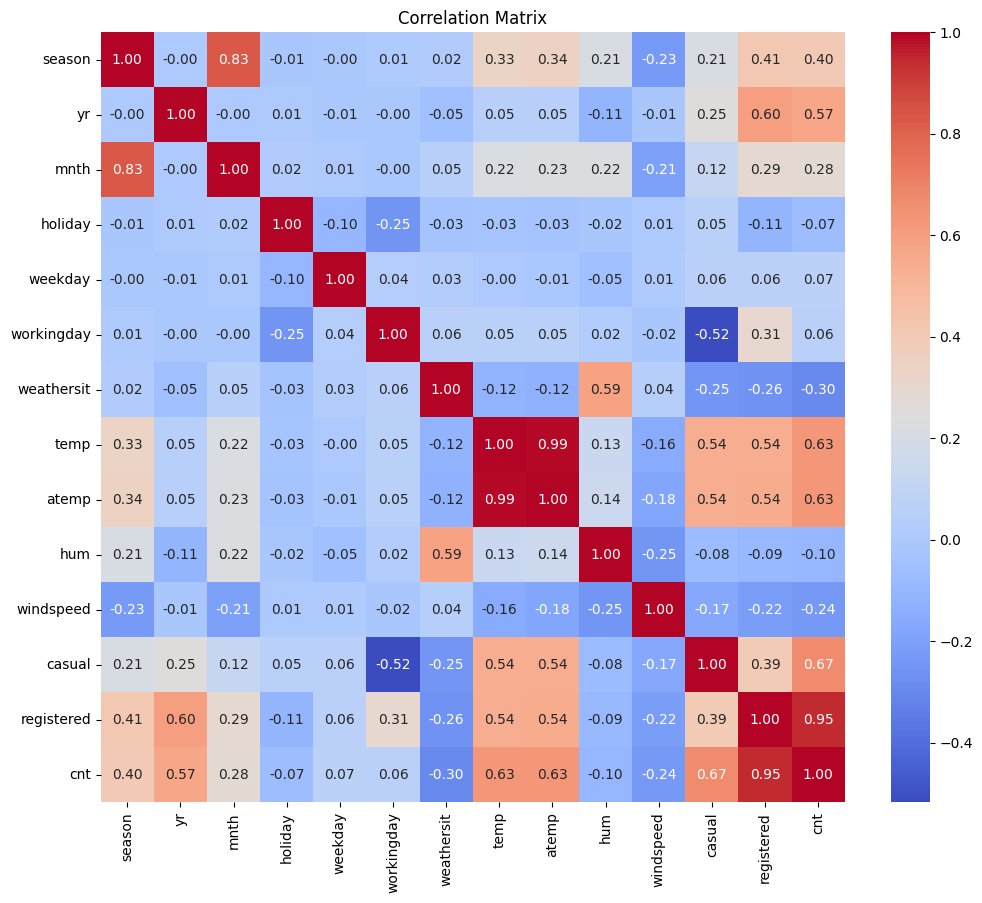

In [4]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [5]:
correlated_features = correlation_matrix[(correlation_matrix['cnt'] > 0.5) | (correlation_matrix['cnt'] < -0.5)].index

In [6]:
correlated_features = correlated_features.drop(['cnt'])
print("Correlated features with 'cnt':\n", correlated_features)

Correlated features with 'cnt':
 Index(['yr', 'temp', 'atemp', 'casual', 'registered'], dtype='object')


In [7]:
x = df[['registered','atemp', 'casual','yr', 'temp']].values
y = df['cnt'].values

In [8]:
#gradient descent
import numpy as np

def gradient_descent(X, y, learning_rate, iterations):
    m = len(y)
    n = X.shape[1]
    theta = np.zeros(n)
    for i in range(iterations):
        h = np.dot(X, theta)
        error = h - y
        gradients = np.dot(X.T, error) / m
        theta -= learning_rate * gradients
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            cost = np.sum(error ** 2) / (2 * m)
            print(f"Iteration {i}, Cost: {cost}")
            
        # Check for convergence
        if np.isnan(theta).any():
            print("Gradient descent diverged. Try reducing the learning rate.")
            break
    return theta


    # Learning rate and number of iterations
learning_rate = 0.001
iterations = 50
    
    # Perform gradient descent
theta = gradient_descent(x, y, learning_rate, iterations)
    
print("Optimal parameters:", theta)


Iteration 0, Cost: 12032566.206164384
Optimal parameters: [-1.26650429e+211 -7.54386370e+208 -2.89614036e+210 -1.83718267e+207
 -6.49415075e+208]


Iteration 0, Cost: 12032566.206164384
Iteration 100, Cost: 42.36864841609512
Iteration 200, Cost: 0.026593052878689707
Iteration 300, Cost: 0.010086787743703128
Iteration 400, Cost: 0.010058609575816585
Iteration 500, Cost: 0.010036893557242901
Iteration 600, Cost: 0.01001522690923463
Iteration 700, Cost: 0.009993607034048623
Iteration 800, Cost: 0.009972033829748426
Iteration 900, Cost: 0.00995050719557884


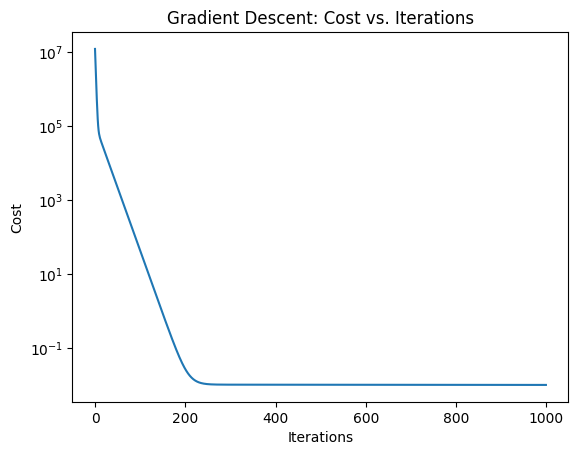

Optimal parameters: [9.99916922e-01 1.01891045e-02 9.99897136e-01 1.45166434e-04
 8.94922727e-03]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X, y, learning_rate, iterations):
    m = len(y)
    n = X.shape[1]
    theta = np.zeros(n)
    costs = []  # List to store costs for plotting
    for i in range(iterations):
        h = np.dot(X, theta)
        error = h - y
        gradients = np.dot(X.T, error) / m
        theta -= learning_rate * gradients
        
        # Compute cost
        cost = np.sum(error ** 2) / (2 * m)
        costs.append(cost)
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
            
        # Check for convergence
        if np.isnan(theta).any():
            print("Gradient descent diverged. Try reducing the learning rate.")
            break
    return theta, costs

learning_rate = 0.0000001
iterations = 1000

theta, costs = gradient_descent(x, y, learning_rate, iterations)

# Plot the cost over iterations
plt.plot(range(iterations), costs)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent: Cost vs. Iterations')
plt.show()

print("Optimal parameters:", theta)

In [10]:
def compute_cost(X, y, w, b):
    m = len(y)
    predictions = np.dot(X, w) + b
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

In [11]:
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    costs = []

    for i in range(iterations):
        # Compute predictions
        predictions = np.dot(X, w) + b
        
        # Compute gradients
        dw = np.dot(X.T, (predictions - y)) / m
        db = np.sum(predictions - y) / m
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Compute cost
        cost = compute_cost(X, y, w, b)
        costs.append(cost)
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
        
    return w, b, costs

In [12]:
learning_rate = 0.0000001
iterations = 1000

w, b, costs1 = gradient_descent(x, y, learning_rate, iterations)

print("Optimal weight vector w:", w)
print("Optimal bias term b:", b)

Iteration 0, Cost: 5332255.718761736
Iteration 100, Cost: 39.17023756944501
Iteration 200, Cost: 0.025357213115001085
Iteration 300, Cost: 0.010095630659365706
Iteration 400, Cost: 0.0100679063296612
Iteration 500, Cost: 0.01004615983952038
Iteration 600, Cost: 0.01002446262042861
Iteration 700, Cost: 0.010002812262896604
Iteration 800, Cost: 0.00998120866482093
Iteration 900, Cost: 0.009959651725228988
Optimal weight vector w: [9.99916860e-01 1.01890499e-02 9.99897113e-01 1.45167315e-04
 8.94918348e-03]
Optimal bias term b: 0.0002913729605360309


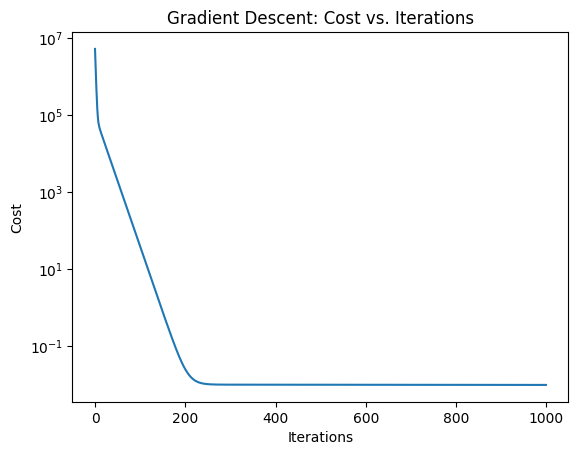

In [13]:
plt.plot(range(iterations), costs1)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent: Cost vs. Iterations')
plt.show()